# Jupyter Example
## LAMMPS: Accelerate/in.lj
Reference: https://github.com/lammps/lammps/blob/master/examples/accelerate/in.lj  
Required files: None  
Description: 3d Lennard-Jones melt

In [1]:
from __future__ import print_function
import random, math
from lammps import IPyLammps
L = IPyLammps()

LAMMPS output is captured by PyLammps wrapper


In [2]:
L.variable("x index 1")
L.variable("y index 1")
L.variable("z index 1")
L.variable("t index 100")
L.variable("xx equal 20*$x")
L.variable("yy equal 20*$y")
L.variable("zz equal 20*$z")

In [3]:
L.units("lj")
L.atom_style("atomic")
L.lattice("fcc 0.8442")
L.region("box block 0 ${xx} 0 ${yy} 0 ${zz}")
L.create_box("1 box")
L.create_atoms("1 box")
L.mass("1 1.0")
L.velocity("all create 1.44 87287 loop geom")

## CPU version

In [4]:
L.pair_style("lj/cut 2.5")
L.pair_coeff("1 1 1.0 1.0 2.5")

In [5]:
L.neighbor("0.3 bin")
L.neigh_modify("delay 0 every 20 check no")

In [6]:
L.fix("1 all nve")

In [7]:
L.thermo("100")

In [8]:
L.run("$t")

['Neighbor list info ...',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 24 24 24',
 '  1 neighbor lists, perpetual/occasional/extra = 1 0 0',
 '  (1) pair lj/cut, perpetual',
 '      attributes: half, newton on',
 '      pair build: half/bin/atomonly/newton',
 '      stencil: half/bin/3d/newton',
 '      bin: standard',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 0',
 '  Time step     : 0.005',
 'Per MPI rank memory allocation (min/avg/max) = 13.82 | 13.82 | 13.82 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '       0         1.44   -6.7733681            0   -4.6134356   -5.0197073 ',
 '     100    0.7574531   -5.7585055            0   -4.6223613   0.20726105 ',
 'Loop time of 1.46719 on 1 procs for 100 steps with 32000 atoms',
 '',
 'Performance: 29444.139 tau/day, 68.158 timesteps/s',
 '99.3% CPU

## INTEL package

In [9]:
L.clear()
L.package("intel 1")

In [10]:
L.units("lj")
L.atom_style("atomic")
L.lattice("fcc 0.8442")
L.region("box block 0 ${xx} 0 ${yy} 0 ${zz}")
L.create_box("1 box")
L.create_atoms("1 box")
L.mass("1 1.0")
L.velocity("all create 1.44 87287 loop geom")

In [11]:
L.pair_style("lj/cut/intel 2.5")
L.pair_coeff("1 1 1.0 1.0 2.5")

In [12]:
L.neighbor("0.3 bin")
L.neigh_modify("delay 0 every 20 check no")

In [13]:
L.fix("1 all nve")

In [14]:
L.thermo("100")

In [15]:
L.run("$t")

['----------------------------------------------------------',
 'Using Intel Package without Coprocessor.',
 'Precision: mixed',
 '----------------------------------------------------------',
 'Neighbor list info ...',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 24 24 24',
 '  1 neighbor lists, perpetual/occasional/extra = 1 0 0',
 '  (1) pair lj/cut/intel, perpetual',
 '      attributes: half, newton on, intel',
 '      pair build: half/bin/newton/intel',
 '      stencil: half/bin/3d/newton',
 '      bin: intel',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 0',
 '  Time step     : 0.005',
 'Per MPI rank memory allocation (min/avg/max) = 280.4 | 280.4 | 280.4 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '       0         1.44   -6.7733683            0   -4.6134358   -5.0197073 ',
 '     100   0.757

## OMP package

In [16]:
L.clear()
L.package("omp 4")

['set 4 OpenMP thread(s) per MPI task',
 'using multi-threaded neighbor list subroutines']

In [17]:
L.units("lj")
L.atom_style("atomic")
L.lattice("fcc 0.8442")
L.region("box block 0 ${xx} 0 ${yy} 0 ${zz}")
L.create_box("1 box")
L.create_atoms("1 box")
L.mass("1 1.0")
L.velocity("all create 1.44 87287 loop geom")

In [18]:
L.pair_style("lj/cut/omp 2.5")
L.pair_coeff("1 1 1.0 1.0 2.5")

In [19]:
L.neighbor("0.3 bin")
L.neigh_modify("delay 0 every 20 check no")

In [20]:
L.fix("1 all nve")

In [21]:
L.thermo("100")

In [22]:
L.run("$t")

['Last active /omp style is pair_style lj/cut/omp',
 'Neighbor list info ...',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 24 24 24',
 '  1 neighbor lists, perpetual/occasional/extra = 1 0 0',
 '  (1) pair lj/cut/omp, perpetual',
 '      attributes: half, newton on, omp',
 '      pair build: half/bin/atomonly/newton/omp',
 '      stencil: half/bin/3d/newton',
 '      bin: standard',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 0',
 '  Time step     : 0.005',
 'Per MPI rank memory allocation (min/avg/max) = 20.97 | 20.97 | 20.97 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '       0         1.44   -6.7733681            0   -4.6134356   -5.0197073 ',
 '     100    0.7574531   -5.7585055            0   -4.6223613   0.20726105 ',
 'Loop time of 0.415242 on 4 procs for 100 steps with 32000 atoms',
 '',


## OPT package

In [23]:
L.pair_style("lj/cut/opt 2.5")
L.pair_coeff("1 1 1.0 1.0 2.5")

In [24]:
L.run("$t")

['No /omp style for force computation currently active',
 'Neighbor list info ...',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 24 24 24',
 '  1 neighbor lists, perpetual/occasional/extra = 1 0 0',
 '  (1) pair lj/cut/opt, perpetual',
 '      attributes: half, newton on, omp',
 '      pair build: half/bin/atomonly/newton/omp',
 '      stencil: half/bin/3d/newton',
 '      bin: standard',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 100',
 '  Time step     : 0.005',
 'Per MPI rank memory allocation (min/avg/max) = 21.47 | 21.47 | 21.47 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '     100    0.7574531   -5.7585055            0   -4.6223613   0.20726105 ',
 '     200   0.75953175   -5.7618892            0   -4.6226272   0.20910575 ',
 'Loop time of 1.21843 on 4 procs for 100 steps with 32000 atoms',

## Visualization

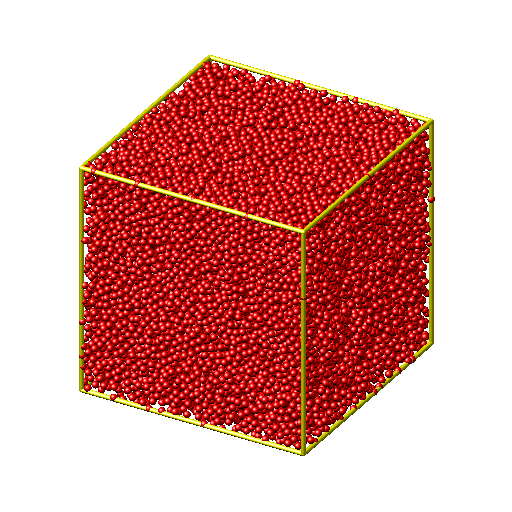

In [25]:
L.image(zoom=1)